In [4]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Load data

In [5]:
base_path = "../bike-sharing-demand"

train = pd.read_csv(os.path.join(base_path, "train.csv"))
test = pd.read_csv(os.path.join(base_path, "test.csv"))
submission = pd.read_csv(os.path.join(base_path, "sampleSubmission.csv"))

display(train.head())
display(test.head())
display(submission.head()) # target: "count"

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
train_features = set(train.columns)
test_features = set(test.columns)

print(train_features)
print(test_features)
print(train_features - test_features)

{'registered', 'weather', 'atemp', 'holiday', 'humidity', 'count', 'season', 'datetime', 'windspeed', 'temp', 'casual', 'workingday'}
{'weather', 'atemp', 'holiday', 'humidity', 'season', 'datetime', 'windspeed', 'temp', 'workingday'}
{'registered', 'count', 'casual'}


In [9]:
display(train.info())
# Convert type of datetime : "object" -> "datetime64"

display(train.isna().sum()) # no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


None

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
display(test.info())
# Convert type of datetime : "object" -> "datetime64"

display(test.isna().sum()) # no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


None

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

## Visualization

In [14]:
def split_in_time(df):
    # Convert object type into datetime
    df["datetime"] = pd.to_datetime(df["datetime"])

    df["year"] = df["datetime"].dt.year
    df["month"] = df["datetime"].dt.month
    df["day"] = df["datetime"].dt.day
    df["hour"] = df["datetime"].dt.hour
    df["minute"] = df["datetime"].dt.minute
    df["second"] = df["datetime"].dt.second
    # Monday=0, Sunday=6
    df["dayofweek"] = df["datetime"].dt.dayofweek
    return df

train = split_in_time(train)
test = split_in_time(test)

display(train)
display(test)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0,0


## Categorical variables

Text(0.5, 1.0, 'Yearly bike demand')

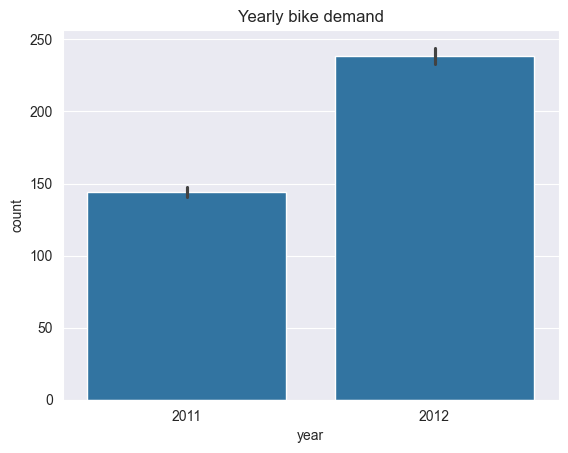

In [15]:
# Year

sns.barplot(data=train, x="year", y="count").set_title("Yearly bike demand")
# 년도가 증가함에 따라 갑자기 수요량이 증가
# 하지만 단 두개의 year만 존재하기 때문에 지속적으로 수요가 증가하는지에 대한 여부는 알 수 없다
# 주어진 데이터 내에서는 분명히 년도별로 수요량의 차이가 존재함을 알 수 있다.
# -> year를 feature로 사용 가능

Text(0.5, 1.0, 'Demand of 2012')

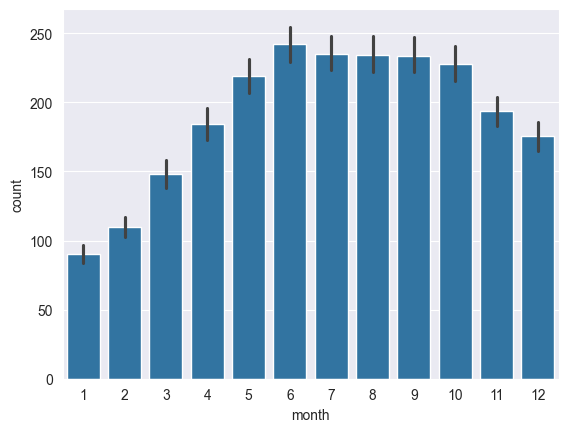

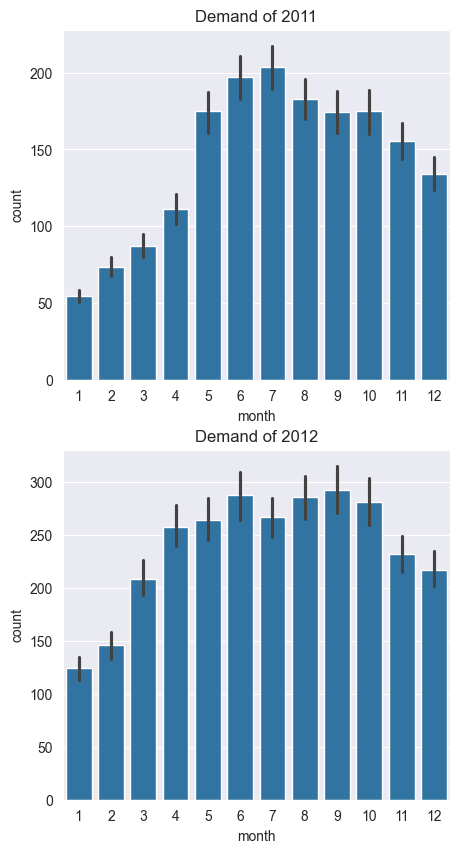

In [21]:
# Month

sns.barplot(data=train, x="month", y="count")

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
sns.barplot(data=train.loc[train["year"] == 2011],
            x="month",
            y="count",
            ax=ax[0]
            ).set_title("Demand of 2011")
sns.barplot(data=train[train["year"] == 2012],
            x="month",
            y="count",
            ax=ax[1],
            ).set_title("Demand of 2012")

In [23]:
print(train.groupby("month")["count"].sum().sort_values(ascending=False).head(3))
print(train.groupby("month")["count"].sum().sort_values(ascending=False).tail(3))

month
6    220733
7    214617
8    213516
Name: count, dtype: int64
month
3    133501
2     99113
1     79884
Name: count, dtype: int64


count        19.000000
mean     109761.894737
std        3819.666767
min      102770.000000
25%      108239.000000
50%      109837.000000
75%      111603.000000
max      118255.000000
Name: count, dtype: float64


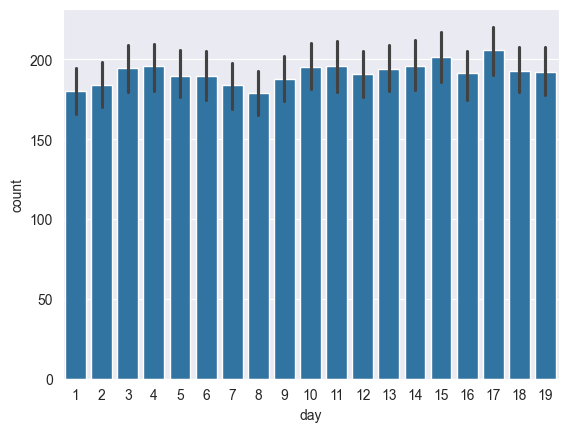

In [28]:
sns.barplot(train, x="day", y="count")
print(train.groupby("day")["count"].sum().describe())

[1 2 3]
[4 5 6]
[7 8 9]
[10 11 12]
season
3    640662
2    588282
4    544034
1    312498
Name: count, dtype: int64


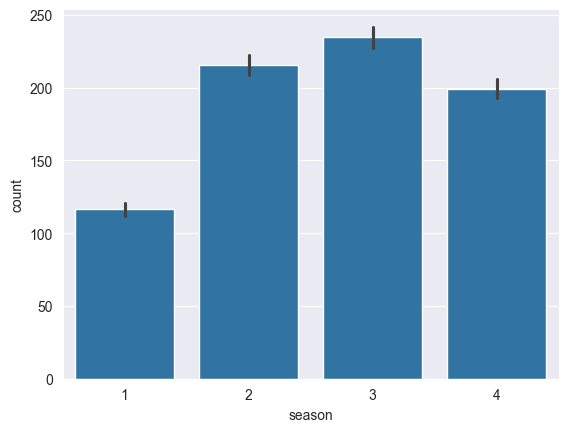

In [33]:
# Seasonal

sns.barplot(data=train, x="season", y="count")

print(train[train["season"] == 1].month.unique())
print(train[train["season"] == 2].month.unique())
print(train[train["season"] == 3].month.unique())
print(train[train["season"] == 4].month.unique())

print(train.groupby("season")["count"].sum().sort_values(ascending=False))

<Axes: xlabel='hour', ylabel='count'>

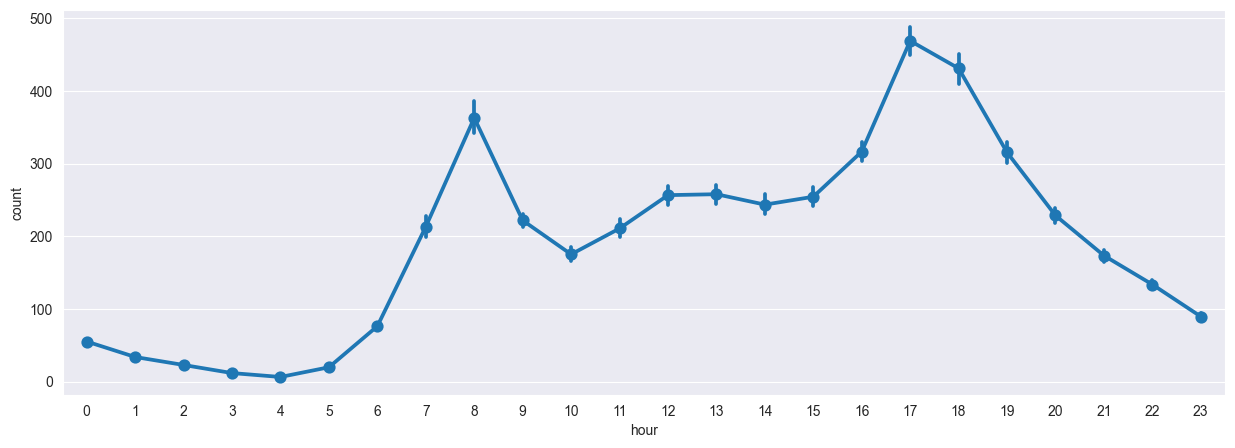

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.pointplot(data=train, x="hour", y="count")

<Axes: xlabel='hour', ylabel='count'>

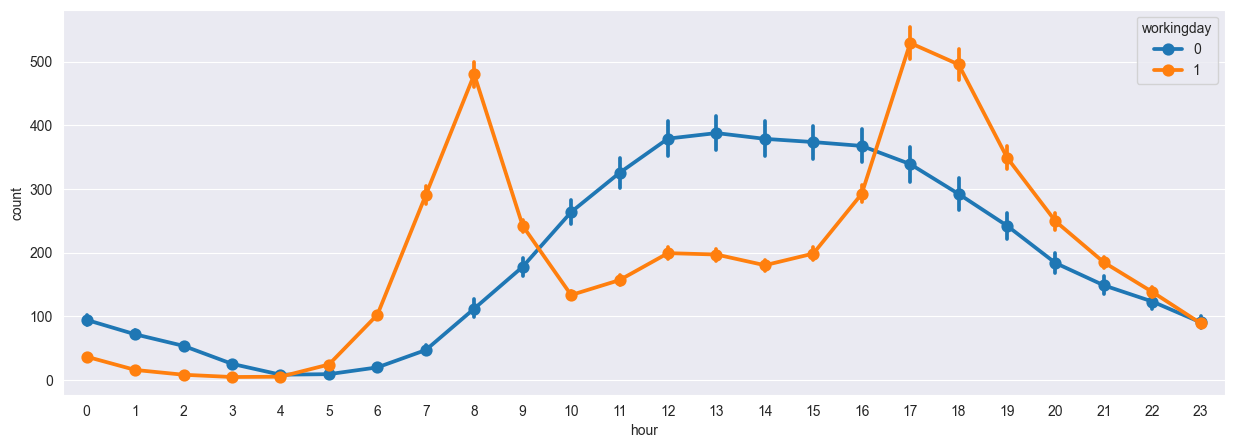

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax)

<Axes: xlabel='hour', ylabel='count'>

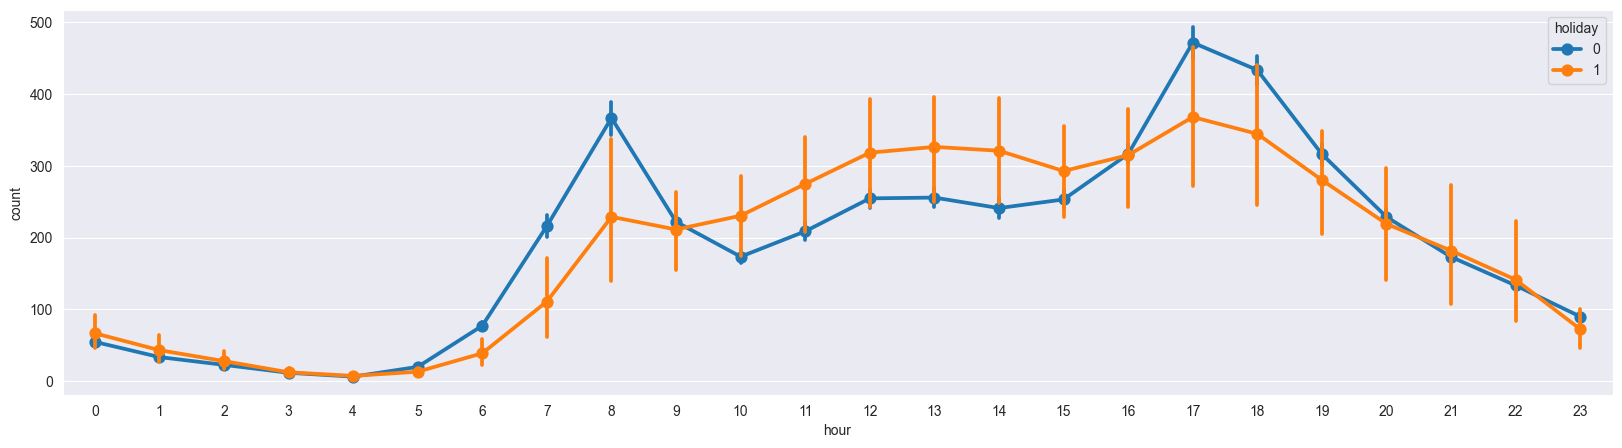

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.pointplot(data=train, x="hour", y="count", hue="holiday", ax=ax)

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


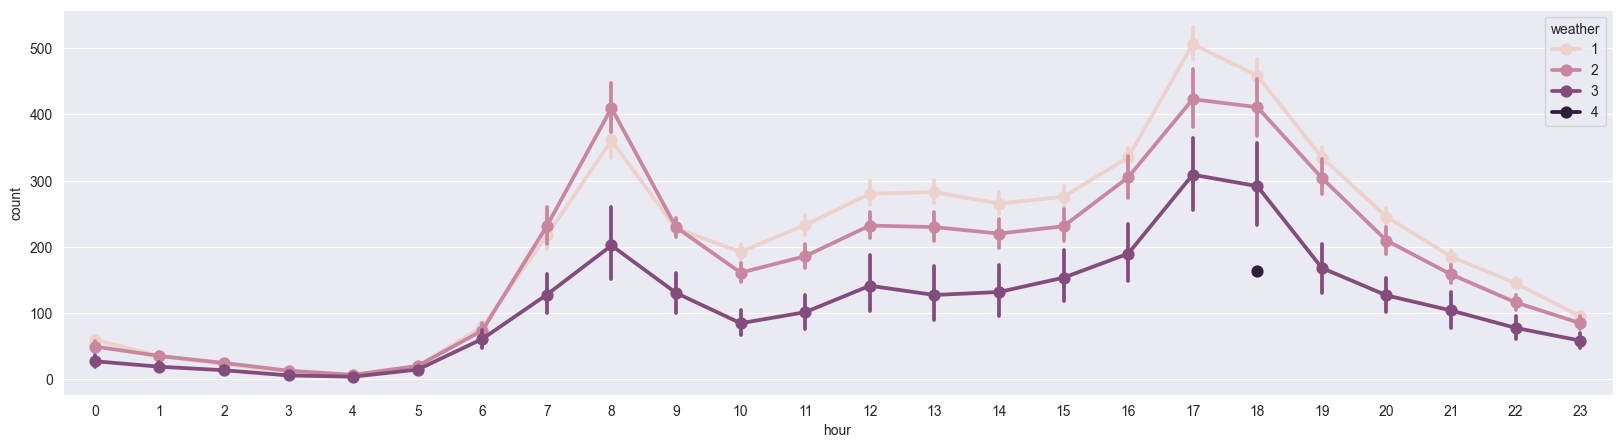

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax)

print(train.groupby("weather")["count"].count())

<Axes: xlabel='hour', ylabel='count'>

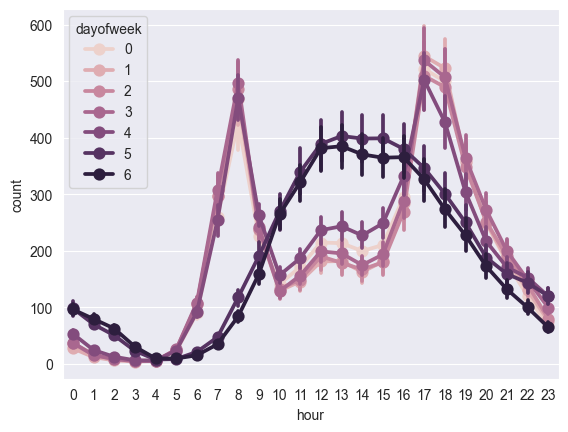

In [45]:
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek")

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')


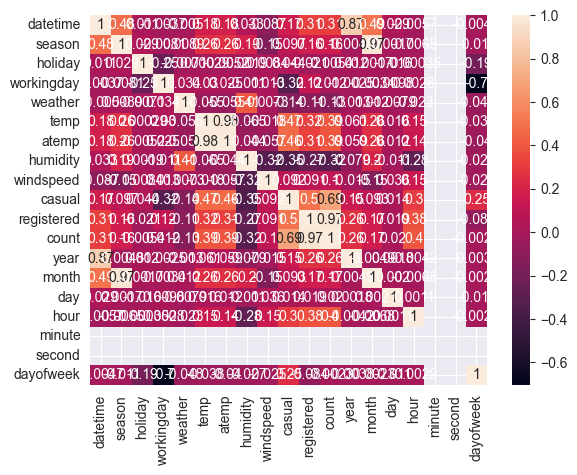

In [54]:
print(train.columns)
sns.heatmap(train.corr(),
            annot=True)
plt.show()

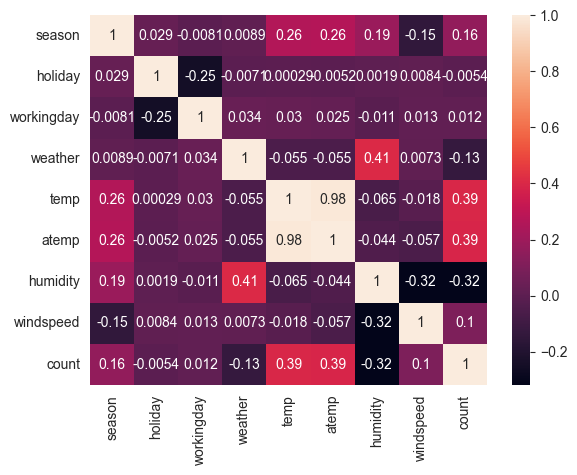

In [55]:
features = ['season', 'holiday', 'workingday',
           'weather', 'temp', 'atemp', 'humidity', 'windspeed',
            'count']

sns.heatmap(train[features].corr(),
            annot=True)
plt.show()
# temp(온도), atemp(체감 온도)의 상관관계가 매우 높음, 다중공선성이 의심됨 -> 둘 중 하나만 feature로 사용

## Numerical variables

<Axes: xlabel='humidity', ylabel='count'>

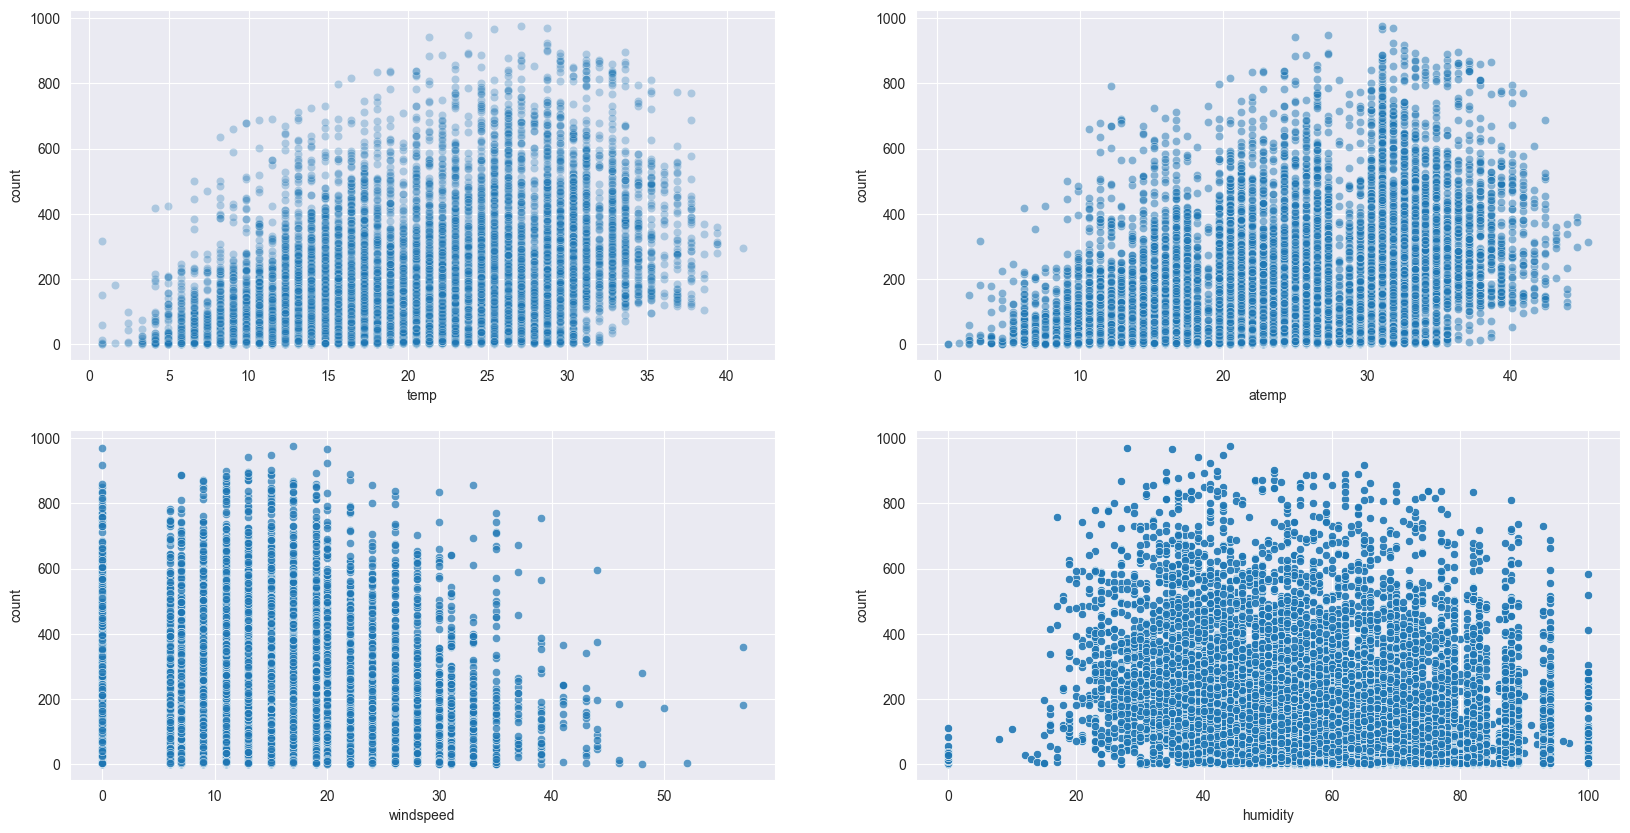

In [61]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20, 10)
sns.scatterplot(data=train, x="temp", y="count", ax=ax[0, 0], alpha=0.3)
sns.scatterplot(data=train, x="atemp", y="count", ax=ax[0, 1], alpha=0.5)
sns.scatterplot(data=train, x="windspeed", y="count", ax=ax[1, 0], alpha=0.7)
sns.scatterplot(data=train, x="humidity", y="count", ax=ax[1, 1], alpha=0.9)

In [64]:
print(len(train[train["windspeed"] == 0]))

1313


## Feature Engineering

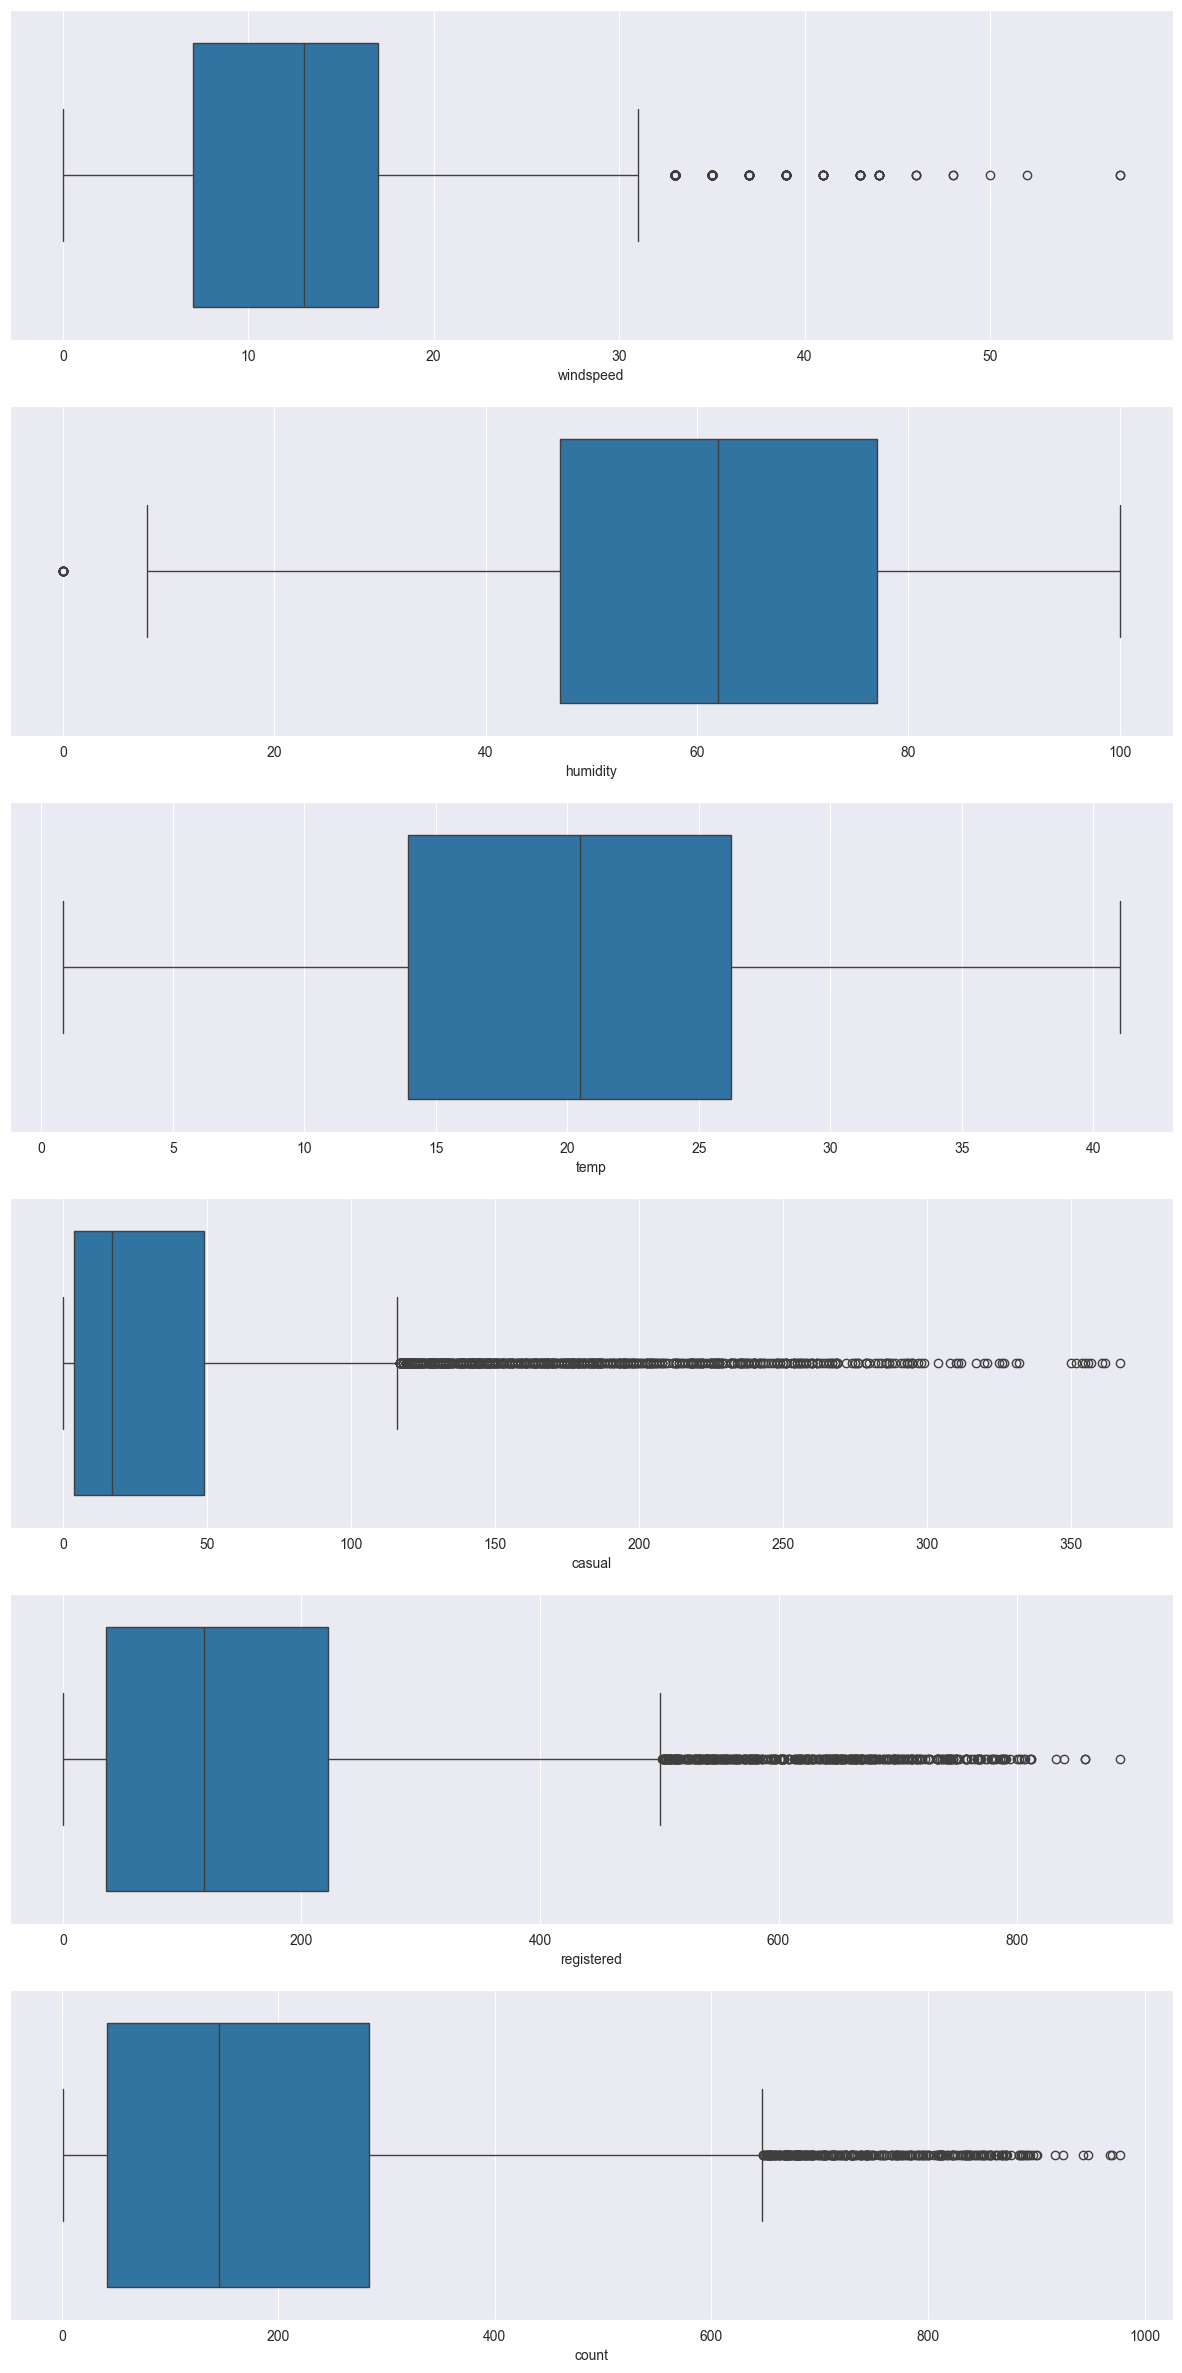

In [69]:
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))
detect_outliers = ["windspeed", "humidity", "temp", "casual", "registered", "count"]
for i, feature in enumerate(detect_outliers):
    sns.boxplot(data=train, x=feature, ax=ax[i])

In [74]:
# Remove outliers
from collections import Counter

def detect_outliers(df, cols, weight=1.5, n=2):
    outlier_indexes = []

    for col in cols:
        q25 = np.percentile(df[col].values, 25)
        q75 = np.percentile(df[col].values, 75)

        iqr = q75 - q25
        iqr_weight = iqr * weight

        min_ = q25 - iqr_weight
        max_ = q75 + iqr_weight

        outlier_idx = df[ (df[col] < min_) | (max_ < df[col])].index
        outlier_indexes.extend(outlier_idx)
    outliers_count = Counter(outlier_indexes)
    multiple_col_outlier_indexes = list(k for k, v in outliers_count.items() if n < v)
    return multiple_col_outlier_indexes

features_to_detect_outlier = ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]
outlier_indexes = detect_outliers(df=train, cols=features_to_detect_outlier)

print(train.shape)
train.drop(outlier_indexes, axis="rows", inplace=True)
print(train.shape)

(10886, 19)
(10846, 19)


/var/folders/3v/_vbmz7l52xqds51kvwrk7k0h0000gn/T/ipykernel_1507/548649696.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["count"], ax=ax)


Skewness: 1.210923
Kurtosis: 1.200871


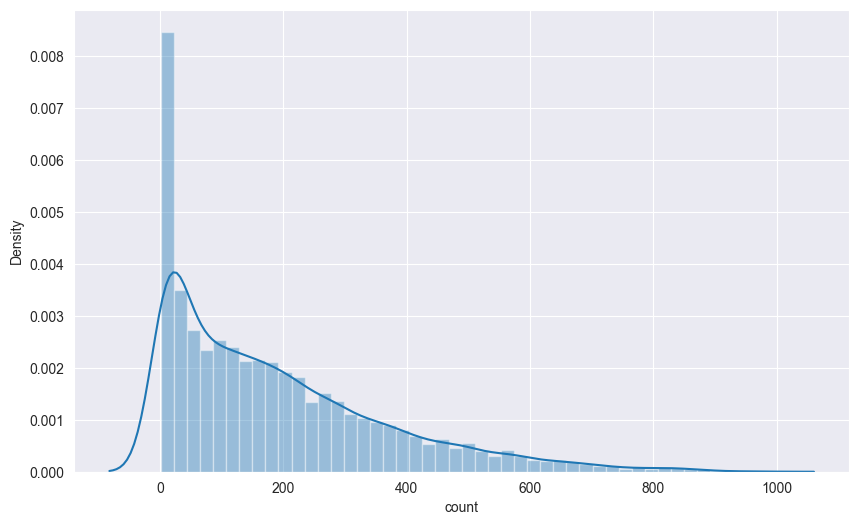

In [82]:
# Browse skewness, kurtosis

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.distplot(train["count"], ax=ax)

print(f"Skewness: {round(train['count'].skew(), 6)}")
print(f"Kurtosis: {round(train['count'].kurt(), 6)}")